In [1]:
import lightkurve as lk
from astropy.timeseries import BoxLeastSquares
import numpy as np
import astropy.units as u

In [2]:
from astroquery.mast import Observations
from astropy.io import fits
from astropy.table import Table
import numpy as np

with fits.open('mastDownload/HLSP/hlsp_everest_k2_llc_211359660-c05_kepler_v2.0_lc/hlsp_everest_k2_llc_211359660-c05_kepler_v2.0_lc.fits') as hdu:
    asn_table = Table(hdu[1].data)

#print(asn_table[0])
'''
FRAW = Raw version of plot
FCOR = The corrected version
'''
x = asn_table['TIME']
y = asn_table['FCOR']

# Convert y to np.arr
yArr = np.asarray(y)
xArr = np.asarray(x)



In [3]:
%matplotlib notebook


<IPython.core.display.Javascript object>


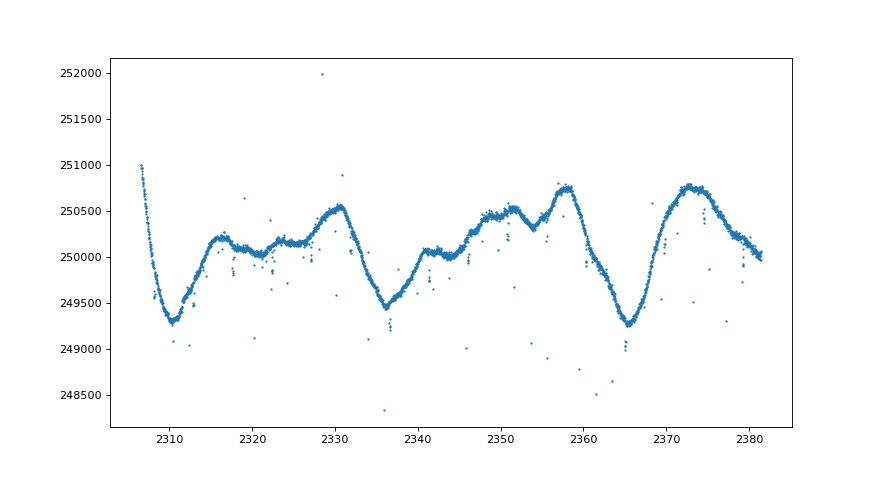

In [4]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x,y,s = 1 )

In [5]:
x = x[(asn_table["QUALITY"] & 0x20) == 0]
y = y[(asn_table["QUALITY"] & 0x20) == 0]

yArr = np.asarray(y)
xArr = np.asarray(x)

<IPython.core.display.Javascript object>


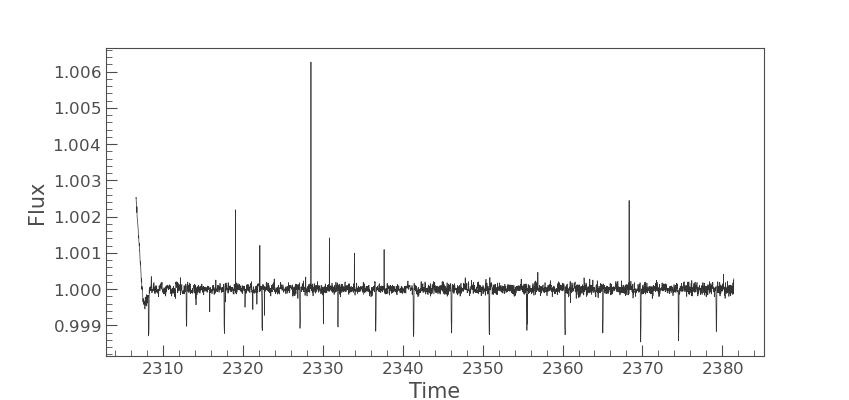

In [6]:
lc = lk.LightCurve(time=xArr, flux=yArr)
lc = lc.flatten(window_length=101)
lc.plot();

<IPython.core.display.Javascript object>


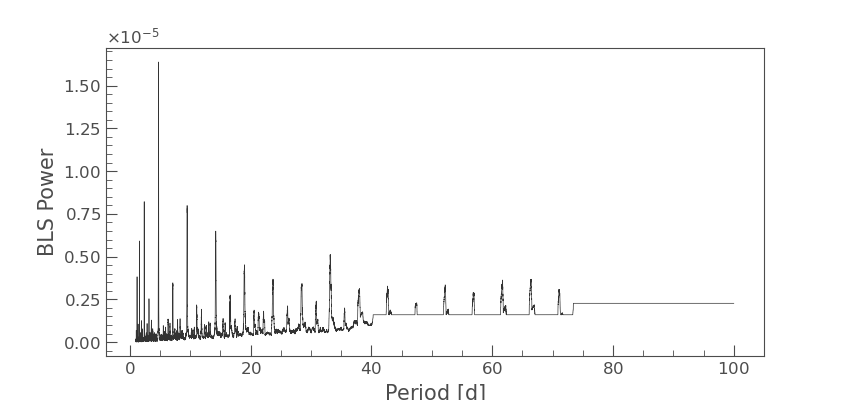

In [11]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 100, 200000)
# Create a BLSPeriodogram
lc = lc.remove_outliers(sigma_upper=4, sigma_lower=100)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=10000);
bls.plot();

In [12]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

4.7397436987184935 d
2308.137531252383
0.25 d


In [13]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

3591
3591


<IPython.core.display.Javascript object>


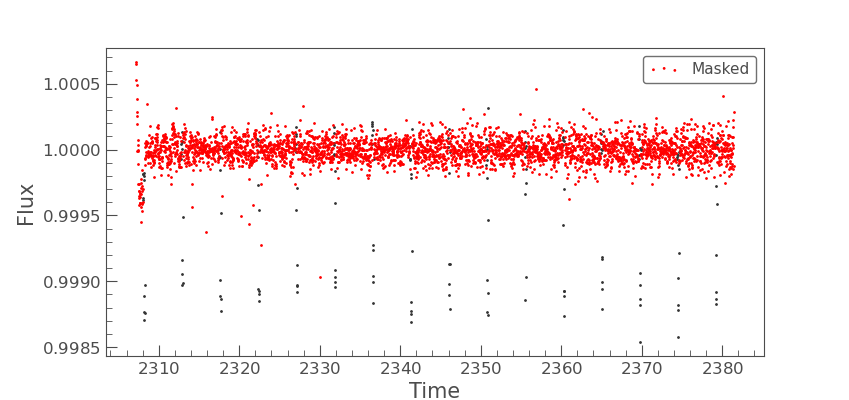

In [14]:
print(len(planet_b_mask))
print(len(lc))
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [15]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

<IPython.core.display.Javascript object>


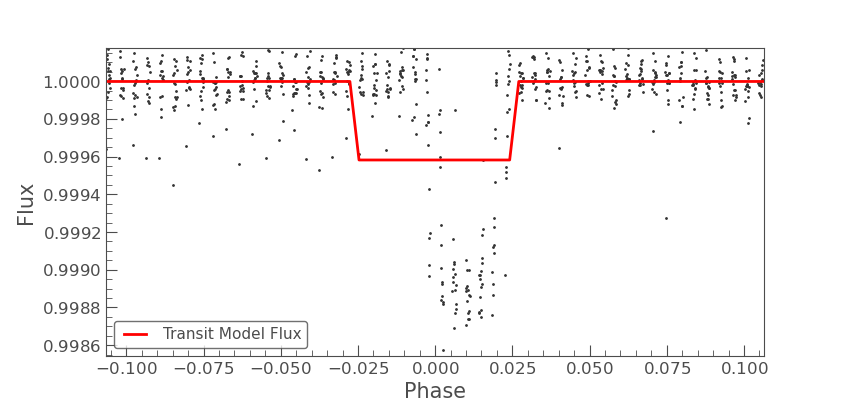

In [16]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

<IPython.core.display.Javascript object>


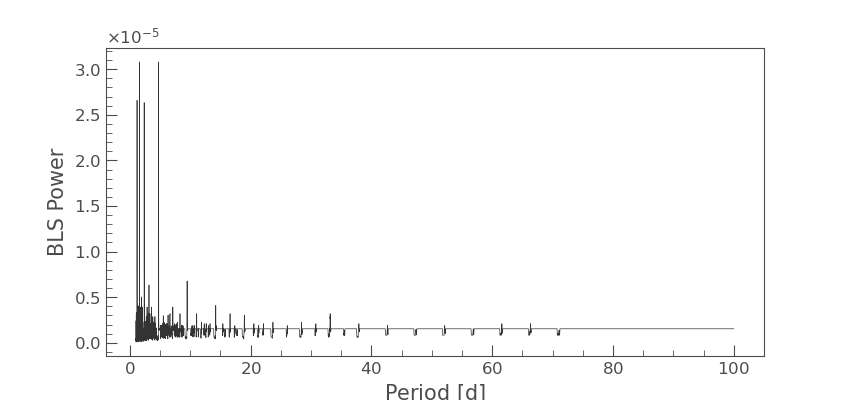

In [21]:
period = np.linspace(1, 100, 20000)
bls = masked_lc.to_periodogram('bls', period=period)
bls.plot();

In [22]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
print(planet_c_period)
print(planet_c_t0)
print(planet_c_dur)

1.5791789589479475 d
2308.270681737835
0.25 d


In [23]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)

<IPython.core.display.Javascript object>


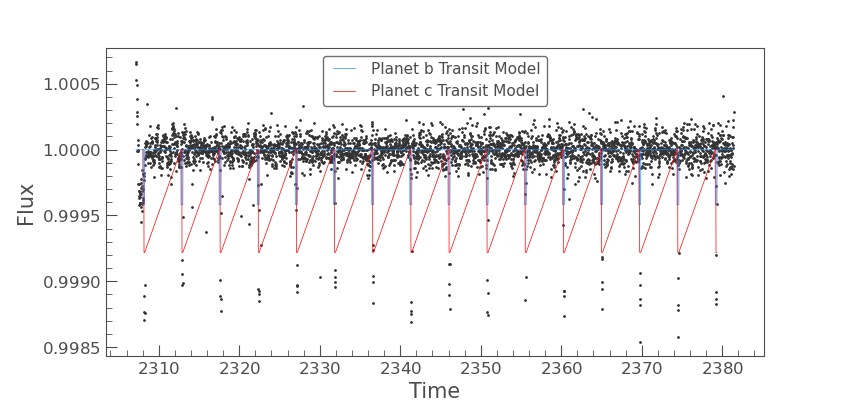

In [24]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model');
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model');

In [ ]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

In [ ]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes